In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
data = pd.read_excel("Minority Head Coaching - real.xlsx", sheet_name='Year by Year Coaching Hires')
data['Average Points'] = data['Points accrued']/data['Number of Matches (MLS)']
data

,Manager (* means still there),Age,Year Hired,Team,Race,Race (B/W/O),Country of Origin (Birthplace),Number of Matches (MLS),Wins (MLS),Draws (MLS),...,Leagues Head Coached.2,Rating.10,Leagues Head Coached.3,Rating.11,Leagues Head Coached.4,Rating.12,Leagues Head Coached.5,Rating.13,Avg Coach Rating,Average Points
0,Bruce Arena,57,2008,LAG,W,W,USA,265,125,70,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,22.300000,1.679245
1,Denis Hamlett,39,2008,CHI,NW,B,Costa Rica,60,24,19,...,MLS,69.3,NaN,0.0,NaN,0.0,NaN,0.0,33.850000,1.516667
2,Frank Yallop,44,2008,SJE,W,W,England,173,58,54,...,MLSR,0.0,USL,58.4,NaN,0.0,NaN,0.0,9.733333,1.317919
3,Gary Smith,40,2008,COL,W,W,England,122,45,37,...,EFL,75.4,USL,58.4,NaN,0.0,NaN,0.0,46.150000,1.409836
4,John Carver,43,2008,TOR,W,W,England,36,11,10,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,10.100000,1.194444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Gerardo Martino*,61,2023,MIA,W,W,Argentina,34,9,7,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,12.566667,1.000000
113,Hernan Losada*,41,2023,MTL,W,W,Argentina,34,12,5,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.000000,1.205882
114,Luchi Gonzalez*,43,2023,SJE,W,W,USA,34,10,14,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,11.550000,1.294118
115,Troy Lesesne*,40,2023,NYRB,W,W,USA,34,11,10,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.000000,1.264706


In [5]:
data['Tenure (Seasons)'].corr(data['Average Points'])

0.34852825783712127

In [6]:
data.columns.to_list()

['Manager (* means still there)',
 'Age',
 'Year Hired',
 'Team',
 'Race',
 'Race (B/W/O)',
 'Country of Origin (Birthplace)',
 'Number of Matches (MLS)',
 'Wins (MLS)',
 'Draws (MLS)',
 'Losses (MLS)',
 'Points accrued',
 'Average Total Squad Compensation',
 'Tenure (Seasons)',
 'Head Coaching Experience (Yrs)',
 'Assistant Coach Experience (Yrs)',
 'Rehire?',
 'Former Player?',
 'Leagues Played',
 'Rating',
 'Leagues Played.1',
 'Rating.1',
 'Leagues Played.2',
 'Rating.2',
 'Leagues Played.3',
 'Rating.3',
 'Leagues Played.4',
 'Rating.4',
 'Leagues Played.5',
 'Rating.5',
 'Leagues Played.6',
 'Rating.6',
 'Leagues Played.7',
 'Rating.7',
 'Avg Rating',
 'Leagues Head Coached',
 'Rating.8',
 'Leagues Head Coached.1',
 'Rating.9',
 'Leagues Head Coached.2',
 'Rating.10',
 'Leagues Head Coached.3',
 'Rating.11',
 'Leagues Head Coached.4',
 'Rating.12',
 'Leagues Head Coached.5',
 'Rating.13',
 'Avg Coach Rating',
 'Average Points']

In [7]:
data['Average Points'].corr(data['Average Total Squad Compensation'])

0.031020180671288606

In [8]:
data[data['Race (B/W/O)'] == 'W']['Avg Coach Rating'].mean()

14.42921146953405

In [9]:
data[data['Race (B/W/O)'] == 'B']['Assistant Coach Experience (Yrs)'].mean()

4.9

In [10]:
data['Average Points'].corr(data['Average Total Squad Compensation'])

0.031020180671288606

In [11]:
stats.ttest_ind(data[data['Race'] == 'W']['Avg Coach Rating'], data[data['Race'] == 'NW']['Avg Coach Rating'])

TtestResult(statistic=0.4202654676579381, pvalue=0.6750757556383041, df=115.0)

In [12]:
df = pd.read_excel("Minority Head Coaching - real.xlsx", sheet_name='Year by Year Team x Comp x HC')
# Calculating total guarantees and count
grouped_df = df.groupby(['Season', 'Race (B/W/O)']).agg(
    total_guarantees=('TotalGuar', 'sum'),
    avg_guarantees=('TotalGuar', 'mean'),
    count=('TotalGuar', 'size')  # Counting the number of entries per group
).reset_index()
grouped_df


,Season,Race (B/W/O),total_guarantees,avg_guarantees,count
0,2008,B,1.398583e+07,6.992916e+06,2
1,2008,O,3.367589e+06,3.367589e+06,1
2,2008,W,3.886055e+07,3.238379e+06,12
3,2009,B,5.134229e+06,5.134229e+06,1
4,2009,O,3.549338e+06,3.549338e+06,1
5,2009,W,4.303838e+07,3.310645e+06,13
6,2010,O,8.036652e+06,4.018326e+06,2
7,2010,W,6.572814e+07,4.381876e+06,15
8,2011,B,1.058454e+07,5.292269e+06,2
9,2011,W,7.436894e+07,4.648059e+06,16


In [13]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Season', y='total_guarantees', hue='Race', marker='o')

# Adding formatted data labels
for i in range(grouped_df.shape[0]):
    label = f"${grouped_df['total_guarantees'][i]:,.2f} ({grouped_df['count'][i]})"
    plt.text(x=grouped_df['Season'][i], 
             y=grouped_df['total_guarantees'][i] + (0.02 * grouped_df['total_guarantees'].max()), 
             s=label, 
             fontdict=dict(color='black', size=5),
             ha='center', va='bottom')

plt.xlabel('Season')
plt.ylabel('Total Compensation (100M)')
plt.title('Total Compensation by Season and Race (with Counts)')
plt.legend(title='Race')
plt.show()

ValueError: Could not interpret value `Race` for parameter `hue`

<Figure size 1000x600 with 0 Axes>

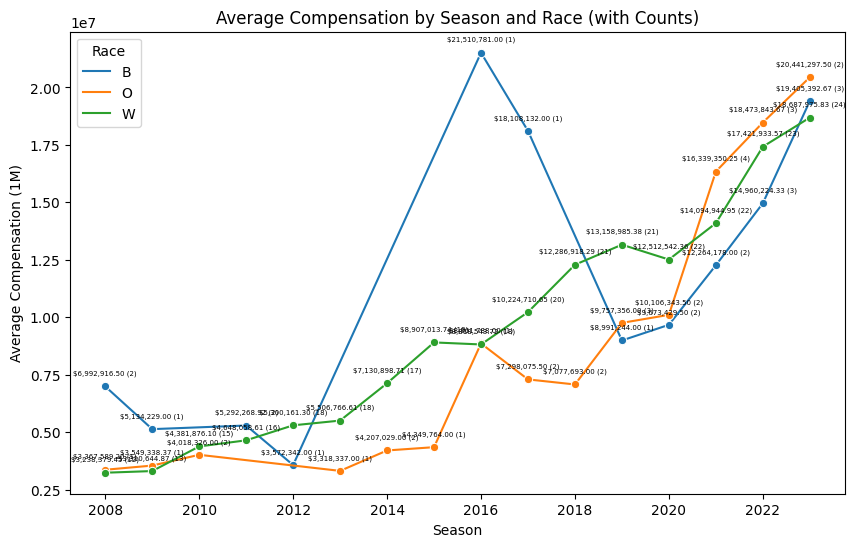

In [14]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Season', y='avg_guarantees', hue='Race (B/W/O)', marker='o')

# Adding formatted data labels
for i in range(grouped_df.shape[0]):
    label = f"${grouped_df['avg_guarantees'][i]:,.2f} ({grouped_df['count'][i]})"
    plt.text(x=grouped_df['Season'][i], 
             y=grouped_df['avg_guarantees'][i] + (0.02 * grouped_df['avg_guarantees'].max()), 
             s=label, 
             fontdict=dict(color='black', size=5),
             ha='center', va='bottom')

plt.xlabel('Season')
plt.ylabel('Average Compensation (1M)')
plt.title('Average Compensation by Season and Race (with Counts)')
plt.legend(title='Race')
plt.show()

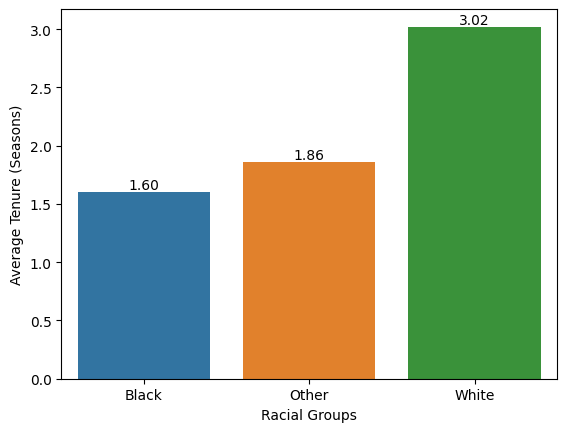

In [15]:
data['Race_BWO_OUT'] = data['Race (B/W/O)'].replace({'W': 'White', 'B': 'Black', 'O':'Other'})
counts = data['Race_BWO_OUT'].value_counts()
# Calculate proportions
total = len(data['Race'])
proportions = (counts / total) * 100
mean_tenure = data.groupby('Race_BWO_OUT')['Tenure (Seasons)'].mean()
# Plotting
sns.barplot(x=mean_tenure.index, y=mean_tenure.values)
plt.xlabel('Racial Groups')
plt.ylabel('Average Tenure (Seasons)')

# Add text annotation for each bar
for i in range(len(mean_tenure)):
    plt.text(i, mean_tenure.values[i], f'{mean_tenure.values[i]:.2f}', ha='center', va='bottom')

plt.show()

In [16]:
data.columns.to_list()

['Manager (* means still there)',
 'Age',
 'Year Hired',
 'Team',
 'Race',
 'Race (B/W/O)',
 'Country of Origin (Birthplace)',
 'Number of Matches (MLS)',
 'Wins (MLS)',
 'Draws (MLS)',
 'Losses (MLS)',
 'Points accrued',
 'Average Total Squad Compensation',
 'Tenure (Seasons)',
 'Head Coaching Experience (Yrs)',
 'Assistant Coach Experience (Yrs)',
 'Rehire?',
 'Former Player?',
 'Leagues Played',
 'Rating',
 'Leagues Played.1',
 'Rating.1',
 'Leagues Played.2',
 'Rating.2',
 'Leagues Played.3',
 'Rating.3',
 'Leagues Played.4',
 'Rating.4',
 'Leagues Played.5',
 'Rating.5',
 'Leagues Played.6',
 'Rating.6',
 'Leagues Played.7',
 'Rating.7',
 'Avg Rating',
 'Leagues Head Coached',
 'Rating.8',
 'Leagues Head Coached.1',
 'Rating.9',
 'Leagues Head Coached.2',
 'Rating.10',
 'Leagues Head Coached.3',
 'Rating.11',
 'Leagues Head Coached.4',
 'Rating.12',
 'Leagues Head Coached.5',
 'Rating.13',
 'Avg Coach Rating',
 'Average Points',
 'Race_BWO_OUT']

In [17]:
# Create a bar chart showing the mean of C for each group in B
ax = sns.barplot(x='Race_OUT', y='Avg Coach Rating', data=data, errorbar=None)

# Add labels and title if desired
plt.xlabel('Racial Group')
plt.ylabel('Average Rating of Leagues Coached In')
#plt.title('Mean of Column C by Groups in Column B')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
# Show the plot
plt.show()


ValueError: Could not interpret input 'Race_OUT'

In [ ]:
df_rehires = data[data['Rehire?'] == 1]
df_rehires

,Manager (* means still there),Age,Year Hired,Team,Race,Race (B/W/O),Country of Origin (Birthplace),Number of Matches (MLS),Wins (MLS),Draws (MLS),...,Rating.11,Leagues Head Coached.4,Rating.12,Leagues Head Coached.5,Rating.13,Avg Coach Rating,Average Points,Race_OUT,Race_BWO_OUT,Race_Binary
0,Bruce Arena,57,2008,LAG,W,W,USA,265,125,70,...,0.0,NaN,0.0,NaN,0.0,22.300000,1.679245,White,White,1
2,Frank Yallop,44,2008,SJE,W,W,England,173,58,54,...,58.4,NaN,0.0,NaN,0.0,9.733333,1.317919,White,White,1
5,Juan Carlos Osorio,47,2008,NYRB,NW,O,Colombia,15,6,3,...,0.0,NaN,0.0,NaN,0.0,0.000000,1.400000,Not White,Other,0
10,Sigi Schmid,56,2009,SEA,W,W,Germany,250,115,56,...,0.0,NaN,0.0,NaN,0.0,0.000000,1.604000,White,White,1
13,Curt Onalfo,41,2010,DCU,W,W,Brazil,18,3,12,...,76.8,NaN,0.0,NaN,0.0,35.400000,1.166667,White,White,1
16,Piotr Nowak,46,2010,PHI,W,W,Poland,75,21,24,...,0.0,NaN,0.0,NaN,0.0,0.000000,1.160000,White,White,1
17,Preki,47,2010,TOR,W,W,Serbia,24,7,7,...,0.0,NaN,0.0,NaN,0.0,13.333333,1.166667,White,White,1
36,Frank Klopas,47,2014,MTL,W,W,Greece,40,13,14,...,0.0,NaN,0.0,NaN,0.0,33.850000,1.325000,White,White,1
37,Frank Yallop,50,2014,CHI,W,W,England,63,13,24,...,80.8,NaN,0.0,NaN,0.0,50.916667,1.000000,White,White,1
42,Oscar Pareja,46,2014,FCD,W,W,Colombia,170,78,43,...,0.0,NaN,0.0,NaN,0.0,0.000000,1.629412,White,White,1


C:\Users\dgilbert\AppData\Local\Temp\ipykernel_5196\1731088977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rehires['Race_BWO_OUT'] = df_rehires['Race (B/W/O)'].replace({'W': 'White', 'B': 'Black', 'O':'Other'})
C:\Users\dgilbert\AppData\Local\Temp\ipykernel_5196\1731088977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rehires['Race_OUT'] = df_rehires['Race'].replace({'W': 'White', 'NW': 'Non-White'})


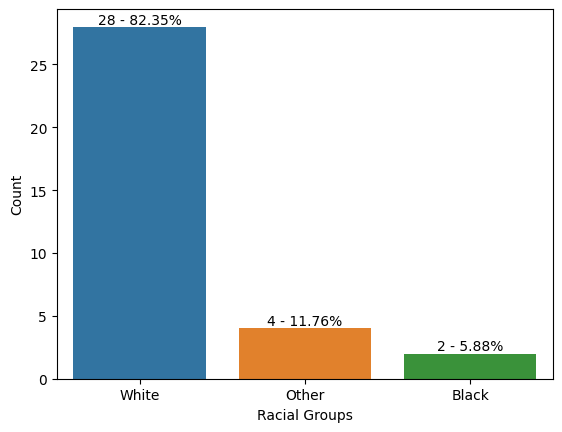

In [ ]:
df_rehires['Race_BWO_OUT'] = df_rehires['Race (B/W/O)'].replace({'W': 'White', 'B': 'Black', 'O':'Other'})
counts = df_rehires['Race_BWO_OUT'].value_counts()
# Calculate proportions
total = len(df_rehires['Race'])
proportions = (counts / total) * 100
sns.barplot(x=df_rehires['Race_BWO_OUT'].value_counts().index, y=df_rehires['Race_BWO_OUT'].value_counts().values)
plt.xlabel('Racial Groups')
plt.ylabel('Count')
# Add text annotation for each bar
for i, (count, proportion) in enumerate(zip(counts.values, proportions)):
    plt.text(i, count, f'{count} - {proportion:.2f}%', ha='center', va='bottom')
plt.show()

C:\Users\dgilbert\AppData\Local\Temp\ipykernel_5196\619681784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rehires['Race_OUT'] = df_rehires['Race'].replace({'W': 'White', 'NW': 'Non-White'})


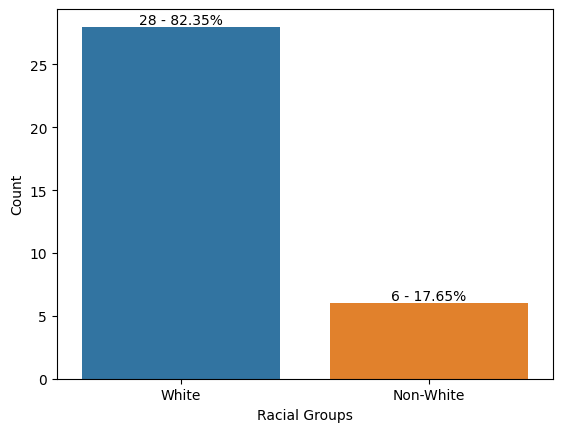

In [ ]:
df_rehires['Race_OUT'] = df_rehires['Race'].replace({'W': 'White', 'NW': 'Non-White'})
counts = df_rehires['Race_OUT'].value_counts()
# Calculate proportions
total = len(df_rehires['Race'])
proportions = (counts / total) * 100
sns.barplot(x=df_rehires['Race_OUT'].value_counts().index, y=df_rehires['Race_OUT'].value_counts().values)
plt.xlabel('Racial Groups')
plt.ylabel('Count')
# Add text annotation for each bar
for i, (count, proportion) in enumerate(zip(counts.values, proportions)):
    plt.text(i, count, f'{count} - {proportion:.2f}%', ha='center', va='bottom')
plt.show()

Regressions

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Manager (* means still there)     117 non-null    object 
 1   Age                               117 non-null    int64  
 2   Year Hired                        117 non-null    int64  
 3   Team                              117 non-null    object 
 4   Race                              117 non-null    object 
 5   Race (B/W/O)                      117 non-null    object 
 6   Country of Origin (Birthplace)    117 non-null    object 
 7   Number of Matches (MLS)           117 non-null    int64  
 8   Wins (MLS)                        117 non-null    int64  
 9   Draws (MLS)                       117 non-null    int64  
 10  Losses (MLS)                      117 non-null    int64  
 11  Points accrued                    117 non-null    int64  
 12  Average 

Tenure

In [ ]:
data['Tenure (Seasons)'].corr(data['Average Points'])

0.34852825783712127

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
data['Race_Binary'] = data['Race'].replace({'W': 1, 'NW': 0})
X = data[['Race_Binary', 'Head Coaching Experience (Yrs)', 'Assistant Coach Experience (Yrs)', 'Average Total Squad Compensation']]
y = data['Tenure (Seasons)']

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Tenure (Seasons)   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     2.553
Date:                Fri, 08 Dec 2023   Prob (F-statistic):             0.0429
Time:                        12:44:08   Log-Likelihood:                -251.80
No. Observations:                 117   AIC:                             513.6
Df Residuals:                     112   BIC:                             527.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
data['Race_Binary'] = data['Race'].replace({'W': 1, 'NW': 0})
X2 = data[['Race_Binary', 'Head Coaching Experience (Yrs)', 'Assistant Coach Experience (Yrs)', 'Average Total ']]
y2 = data['Tenure (Seasons)']

# Adding a constant to the model (for the intercept)
X2 = sm.add_constant(X2)

# Fit the linear regression model
model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       Tenure (Seasons)   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.899
Date:                Wed, 06 Dec 2023   Prob (F-statistic):              0.116
Time:                        15:56:40   Log-Likelihood:                -253.07
No. Observations:                 117   AIC:                             516.1
Df Residuals:                     112   BIC:                             530.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
data['Race_Binary'] = data['Race'].replace({'W': 1, 'NW': 0})
X3 = data[['Race_Binary', 'Average Points']]
y3 = data['Tenure (Seasons)']

# Adding a constant to the model (for the intercept)
X3 = sm.add_constant(X3)

# Fit the linear regression model
model3 = sm.OLS(y3, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:       Tenure (Seasons)   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     10.65
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           5.73e-05
Time:                        15:54:39   Log-Likelihood:                -246.88
No. Observations:                 117   AIC:                             499.8
Df Residuals:                     114   BIC:                             508.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3641      0.935     -1.

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
data['Race_Binary'] = data['Race'].replace({'W': 1, 'NW': 0})
X4 =  data[['Race_Binary', 'Avg Coach Rating']]
y4 = data['Tenure (Seasons)']

# Adding a constant to the model (for the intercept)
X4 = sm.add_constant(X4)

# Fit the linear regression model
model4 = sm.OLS(y4, X4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:       Tenure (Seasons)   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     3.796
Date:                Wed, 06 Dec 2023   Prob (F-statistic):             0.0254
Time:                        15:54:41   Log-Likelihood:                -253.14
No. Observations:                 117   AIC:                             512.3
Df Residuals:                     114   BIC:                             520.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.8395      0.447  

Rehire

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
data['Race_Binary'] = data['Race'].replace({'W': 1, 'NW': 0})
X5 =  data[['Race_Binary', 'Average Points']]
y5 = data['Rehire?']

# Adding a constant to the model (for the intercept)
X5 = sm.add_constant(X5)

# Fit the linear regression model
model5 = sm.OLS(y5, X5).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                Rehire?   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6460
Date:                Thu, 07 Dec 2023   Prob (F-statistic):              0.526
Time:                        15:47:52   Log-Likelihood:                -72.976
No. Observations:                 117   AIC:                             152.0
Df Residuals:                     114   BIC:                             160.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0551      0.212      0.

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
data['Race_Binary'] = data['Race'].replace({'W': 1, 'NW': 0})
X6 =  data[['Race_Binary', 'Average Points', 'Assistant Coach Experience (Yrs)']]
y6 = data['Rehire?']

# Adding a constant to the model (for the intercept)
X6 = sm.add_constant(X6)

# Fit the linear regression model
model6= sm.OLS(y6, X6).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                Rehire?   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7998
Date:                Thu, 07 Dec 2023   Prob (F-statistic):              0.496
Time:                        15:48:46   Log-Likelihood:                -72.407
No. Observations:                 117   AIC:                             152.8
Df Residuals:                     113   BIC:                             163.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
data['Race_Binary'] = data['Race'].replace({'W': 1, 'NW': 0})
X7 =  data[['Race_Binary', 'Average Points', 'Head Coaching Experience (Yrs)']]
y7 = data['Rehire?']

# Adding a constant to the model (for the intercept)
X7 = sm.add_constant(X7)

# Fit the linear regression model
model7= sm.OLS(y7, X7).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                Rehire?   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     4.071
Date:                Thu, 07 Dec 2023   Prob (F-statistic):            0.00870
Time:                        15:49:18   Log-Likelihood:                -67.632
No. Observations:                 117   AIC:                             143.3
Df Residuals:                     113   BIC:                             154.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
data['Race_Binary'] = data['Race'].replace({'W': 1, 'NW': 0})
X8 =  data[['Race_Binary', 'Average Points', 'Head Coaching Experience (Yrs)', 'Assistant Coach Experience (Yrs)']]
y8 = data['Rehire?']

# Adding a constant to the model (for the intercept)
X8 = sm.add_constant(X8)

# Fit the linear regression model
model8 = sm.OLS(y8, X8).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                Rehire?   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     3.187
Date:                Fri, 08 Dec 2023   Prob (F-statistic):             0.0161
Time:                        12:41:09   Log-Likelihood:                -67.330
No. Observations:                 117   AIC:                             144.7
Df Residuals:                     112   BIC:                             158.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
# Define the independent variables (X) and the dependent variable (y)
data['Race_Binary'] = data['Race'].replace({'W': 1, 'NW': 0})
X8 =  data[['Rehire?', 'Race_Binary']]
y8 = data['Average Points']

# Adding a constant to the model (for the intercept)
X8 = sm.add_constant(X8)

# Fit the linear regression model
model8 = sm.OLS(y8, X8).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:         Average Points   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.647
Date:                Fri, 08 Dec 2023   Prob (F-statistic):              0.197
Time:                        11:29:31   Log-Likelihood:                -12.198
No. Observations:                 117   AIC:                             30.40
Df Residuals:                     114   BIC:                             38.68
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1971      0.057     20.913      

In [ ]:
X9 = data[['Race_Binary', 'Average Points', 'Head Coaching Experience (Yrs)', 'Assistant Coach Experience (Yrs)']]
Y9 = data['Rehire?']
X9 = sm.add_constant(X9)
model_logit1 = sm.Logit(Y9, X9).fit()
print(model_logit1.summary())

Optimization terminated successfully.
         Current function value: 0.554423
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Rehire?   No. Observations:                  117
Model:                          Logit   Df Residuals:                      112
Method:                           MLE   Df Model:                            4
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                 0.08008
Time:                        09:19:02   Log-Likelihood:                -64.867
converged:                       True   LL-Null:                       -70.514
Covariance Type:            nonrobust   LLR p-value:                   0.02345
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.4300      1.102     -2.20

In [ ]:
X9 = data[['Race_Binary', 'Average Points']]
Y9 = data['Rehire?']
X9 = sm.add_constant(X9)
model_logit1 = sm.Logit(Y9, X9).fit()
print(model_logit1.summary())

Optimization terminated successfully.
         Current function value: 0.596972
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Rehire?   No. Observations:                  117
Model:                          Logit   Df Residuals:                      114
Method:                           MLE   Df Model:                            2
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                0.009482
Time:                        09:19:51   Log-Likelihood:                -69.846
converged:                       True   LL-Null:                       -70.514
Covariance Type:            nonrobust   LLR p-value:                    0.5124
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.0846      1.077     -1.935      0.053      -4.196       0.027
Race_Binary      

In [20]:
import pandas as pd
import statsmodels.api as sm
rehired = pd.read_excel("Minority Head Coaching - real.xlsx", sheet_name='Rehired')
rehired['Manager'] = rehired['Manager (* means still there)']
rehired['Average Points'] = rehired['Running Points']/rehired['Running Matches']
rehired

,Manager (* means still there),Rehired,Rehire?,Year Hired,Old Team,New Team,Race,Race (B/W/O),Black,Running Matches,...,Rating.10,Leagues Head Coached.3,Rating.11,Leagues Head Coached.4,Rating.12,Leagues Head Coached.5,Rating.13,Avg Coach Rating,Manager,Average Points
0,Bob Bradley,1,1,2006,Chivas,LAG,W,W,0,297,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,28.700000,Bob Bradley,1.511785
1,Sigi Schmid,1,1,2006,CLB,SEA,W,W,0,263,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.000000,Sigi Schmid,1.524715
2,Frank Yallop,1,1,2006,LAG,SJE,W,W,0,136,...,75.4,USL,58.4,NaN,0.0,NaN,0.0,46.150000,Frank Yallop,1.522059
3,Dominic Kinnear,1,1,2006,HOU,SJE,W,W,0,336,...,60.5,DSL,77.1,GSL,80.7,A1l,55.9,66.566667,Dominic Kinnear,1.434524
4,Bruce Arena,1,1,2006,NYRB,LAG,W,W,0,143,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,22.300000,Bruce Arena,1.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Bob Bradley,0,1,2022,TOR,-,W,W,0,475,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,28.700000,Bob Bradley,1.490526
100,Ezra Hendrickson,0,0,2022,CHI,-,NW,B,1,44,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.000000,Ezra Hendrickson,1.136364
101,Miguel Angel Ramirez,0,0,2022,CLT,-,W,W,0,14,...,55.1,NaN,0.0,NaN,0.0,NaN,0.0,20.733333,Miguel Angel Ramirez,1.142857
102,Paulo Nagamura,0,0,2022,HOU,-,NW,O,0,29,...,64.8,FTI,76.8,NaN,0.0,NaN,0.0,47.983333,Paulo Nagamura,1.000000


In [21]:
rehired['Race_Binary'] = rehired['Race'].replace({'W': 1, 'NW': 0})
X9 = rehired[['Race_Binary', 'Average Points', 'Experience-Post Tenure', 'Assistant Coach Experience (Yrs)', 'Avg Coach Rating', 'Avg Rating']]
Y9 = rehired['Rehired']
X9 = sm.add_constant(X9)
model_logit1 = sm.Logit(Y9, X9).fit()
print(model_logit1.summary())

Optimization terminated successfully.
         Current function value: 0.569893
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Rehired   No. Observations:                  104
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            6
Date:                Wed, 20 Dec 2023   Pseudo R-squ.:                  0.1165
Time:                        11:26:19   Log-Likelihood:                -59.269
converged:                       True   LL-Null:                       -67.083
Covariance Type:            nonrobust   LLR p-value:                   0.01589
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.3913      1.415     -2.39

In [22]:
# Define the independent variables (X) and the dependent variable (y)
X8 =  rehired[['Race_Binary', 'Average Points', 'Experience-Post Tenure', 'Assistant Coach Experience (Yrs)', 'Avg Coach Rating', 'Avg Rating']]
y8 = rehired['Rehired']

# Adding a constant to the model (for the intercept)
X8 = sm.add_constant(X8)

# Fit the linear regression model
model8 = sm.OLS(y8, X8).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                Rehired   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.438
Date:                Wed, 20 Dec 2023   Prob (F-statistic):             0.0308
Time:                        11:26:19   Log-Likelihood:                -63.006
No. Observations:                 104   AIC:                             140.0
Df Residuals:                      97   BIC:                             158.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [23]:
rehired_grouped = rehired.groupby('Manager')[['Race', 'Race (B/W/O)']]

In [24]:
rehired['Race_Binary'] = rehired['Race'].replace({'W': 1, 'NW': 0})
X9 = rehired[['Black', 'Average Points', 'HC Exp at rehire', 'AC Exp at rehire', 'Avg Coach Rating', 'Avg Rating']]
Y9 = rehired['Rehired']
X9 = sm.add_constant(X9)
model_logit1 = sm.Logit(Y9, X9).fit()
print(model_logit1.summary())

Optimization terminated successfully.
         Current function value: 0.559172
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Rehired   No. Observations:                  104
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            6
Date:                Wed, 20 Dec 2023   Pseudo R-squ.:                  0.1331
Time:                        11:26:21   Log-Likelihood:                -58.154
converged:                       True   LL-Null:                       -67.083
Covariance Type:            nonrobust   LLR p-value:                  0.006594
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.7828      1.461     -2.590      0.010      -6.645      -0.920
Black      

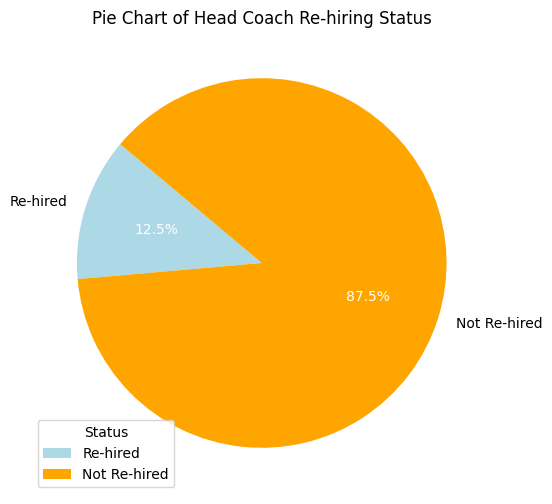

In [25]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Re-hired', 'Not Re-hired']
sizes = [1, 7]  # 1 out of 8 re-hired, the rest not re-hired
colors = ['lightblue', 'orange']

# Creating the pie chart
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Customizing the labels
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')

# Adding the legend
plt.legend(patches, labels, title="Status", loc="best")

# Title
plt.title('Pie Chart of Head Coach Re-hiring Status')

# Display the pie chart
plt.show()


In [26]:
# Define the independent variables (X) and the dependent variable (y)
X8 =  rehired[['Black', 'Average Points', 'HC Exp at rehire', 'AC Exp at rehire', 'Avg Coach Rating', 'Avg Rating']]
y8 = rehired['Rehired']

# Adding a constant to the model (for the intercept)
X8 = sm.add_constant(X8)

# Fit the linear regression model
model8 = sm.OLS(y8, X8).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                Rehired   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2.818
Date:                Wed, 20 Dec 2023   Prob (F-statistic):             0.0143
Time:                        11:26:22   Log-Likelihood:                -61.956
No. Observations:                 104   AIC:                             137.9
Df Residuals:                      97   BIC:                             156.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0969      0.211  

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
rehired['Race_Binary'] = rehired['Race'].replace({'W': 1, 'NW': 0})
X = rehired[['Race_Binary', 'Average Points', 'HC Exp at rehire', 'AC Exp at rehire', 'Avg Coach Rating', 'Avg Rating']]
y = rehired['Rehired']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


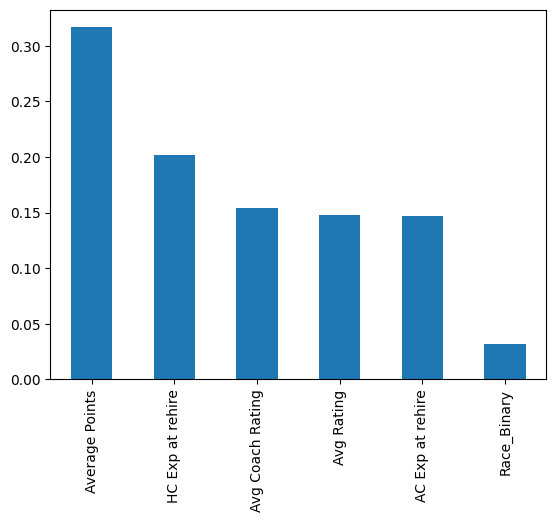

In [34]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

best_rf = rand_search.best_estimator_
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();